# Importing the libraries

In [1]:
import numpy as np # This is for mathematical operations
import pandas as pd # This is for the dataset modification and its operations
import os
import matplotlib.patches as patches
import matplotlib.pyplot as plt # This is for the visualizations

### **The below dataset is from the Open Images Dataset** 

In [2]:
#Loading the datasets which are downloaded from web
train_df = pd.read_csv('oidv6-train-annotations-bbox.csv')
test_df = pd.read_csv('test-annotations-bbox.csv')
validation_df = pd.read_csv('validation-annotations-bbox.csv')

## **LabelName for mobile phone in the dataset is /m/050k8**
### **Extracting only mobile phone data**

In [3]:
mobile_train = train_df[train_df['LabelName'] == '/m/050k8']
mobile_test = test_df[test_df['LabelName'] == '/m/050k8']
mobile_validation = validation_df[validation_df['LabelName'] == '/m/050k8']

In [4]:
mobile_train.to_csv('mobile_train_data.csv',index=False)
mobile_test.to_csv('mobile_test_dataset.csv',index=False)
mobile_validation.to_csv('mobile_validation.csv',index=False)

In [5]:
mobile_train.shape, mobile_test.shape, mobile_validation.shape

((6365, 21), (463, 13), (147, 13))

In [6]:
mobile_train

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
1149,0000b9115cdf1e54,xclick,/m/050k8,1,0.095703,0.707031,0.497396,0.949219,0,0,...,0,0,0.469727,0.707031,0.095703,0.347656,0.949219,0.673177,0.610677,0.497396
2487,00016982f6086d39,xclick,/m/050k8,1,0.000000,0.997222,0.000000,0.998438,0,1,...,0,0,0.377778,0.522222,0.997222,0.000000,0.998438,0.000000,0.528125,0.414062
3963,0002a1a755d730ca,xclick,/m/050k8,1,0.178125,0.409375,0.339583,0.695833,1,0,...,0,0,0.312500,0.331250,0.178125,0.409375,0.339583,0.695833,0.650000,0.366667
5408,000384bb6da4764b,xclick,/m/050k8,1,0.695545,0.985148,0.434375,0.803750,0,0,...,0,0,0.809406,0.985148,0.854785,0.695545,0.434375,0.473750,0.803750,0.748750
8040,0005829bfcf77ca3,xclick,/m/050k8,1,0.611875,0.699375,0.585458,0.787535,1,0,...,0,0,0.699375,0.621250,0.691875,0.611875,0.585458,0.596789,0.726157,0.787535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14602894,ffd92391b7d03016,activemil,/m/050k8,1,0.798437,0.964063,0.392188,0.531250,0,1,...,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
14604511,ffe1e233465f0a49,activemil,/m/050k8,1,0.025602,0.944277,0.040493,0.917253,0,1,...,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
14609308,fffa17e6456b26d6,activemil,/m/050k8,1,0.224771,0.872477,0.139375,0.801250,1,0,...,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
14609730,fffcbc0b28c934f7,activemil,/m/050k8,1,0.078750,0.292500,0.176667,0.615833,0,0,...,1,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000


In [7]:
#Retriving all the columns present in the train dataset
mobile_train.columns

Index(['ImageID', 'Source', 'LabelName', 'Confidence', 'XMin', 'XMax', 'YMin',
       'YMax', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction',
       'IsInside', 'XClick1X', 'XClick2X', 'XClick3X', 'XClick4X', 'XClick1Y',
       'XClick2Y', 'XClick3Y', 'XClick4Y'],
      dtype='object')

In [8]:
#Retriving all the columns present in the test dataset
mobile_test.columns

Index(['ImageID', 'Source', 'LabelName', 'Confidence', 'XMin', 'XMax', 'YMin',
       'YMax', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction',
       'IsInside'],
      dtype='object')

In [9]:
# Display basic dataset information
print("Dataset Info:")
mobile_train.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 6365 entries, 1149 to 14609731
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ImageID      6365 non-null   object 
 1   Source       6365 non-null   object 
 2   LabelName    6365 non-null   object 
 3   Confidence   6365 non-null   int64  
 4   XMin         6365 non-null   float64
 5   XMax         6365 non-null   float64
 6   YMin         6365 non-null   float64
 7   YMax         6365 non-null   float64
 8   IsOccluded   6365 non-null   int64  
 9   IsTruncated  6365 non-null   int64  
 10  IsGroupOf    6365 non-null   int64  
 11  IsDepiction  6365 non-null   int64  
 12  IsInside     6365 non-null   int64  
 13  XClick1X     6365 non-null   float64
 14  XClick2X     6365 non-null   float64
 15  XClick3X     6365 non-null   float64
 16  XClick4X     6365 non-null   float64
 17  XClick1Y     6365 non-null   float64
 18  XClick2Y     6365 non-null   flo

In [10]:
#checking for the null values in the dataset
mobile_train.isna().sum()

ImageID        0
Source         0
LabelName      0
Confidence     0
XMin           0
XMax           0
YMin           0
YMax           0
IsOccluded     0
IsTruncated    0
IsGroupOf      0
IsDepiction    0
IsInside       0
XClick1X       0
XClick2X       0
XClick3X       0
XClick4X       0
XClick1Y       0
XClick2Y       0
XClick3Y       0
XClick4Y       0
dtype: int64

### **Dataloader.py requires the txt file containing all the ImageID's in the format of**
**train/f9e0434389a1d4dd**
<br>
**validation/1a007563ebc18664**
<br>
**test/ea8bfd4e765304db**

In [11]:
# Function to write ImageIDs to a file with the required format
def write_image_ids(dataset, prefix, filename):
    # Open a text file to write the image IDs
    with open(filename, 'w') as f:
        for image_id in dataset['ImageID']:
            # Write each ImageID with the specified prefix (train/test/validation)
            f.write(f'{prefix}/{image_id}\n')

# Write ImageIDs to text files
write_image_ids(mobile_train, 'train', 'train_image_ids.txt')
write_image_ids(mobile_test, 'test', 'test_image_ids.txt')
write_image_ids(mobile_validation, 'validation', 'validation_image_ids.txt')

# **Images are extracted with the helper file from the dataset holders which is in downloader.py**

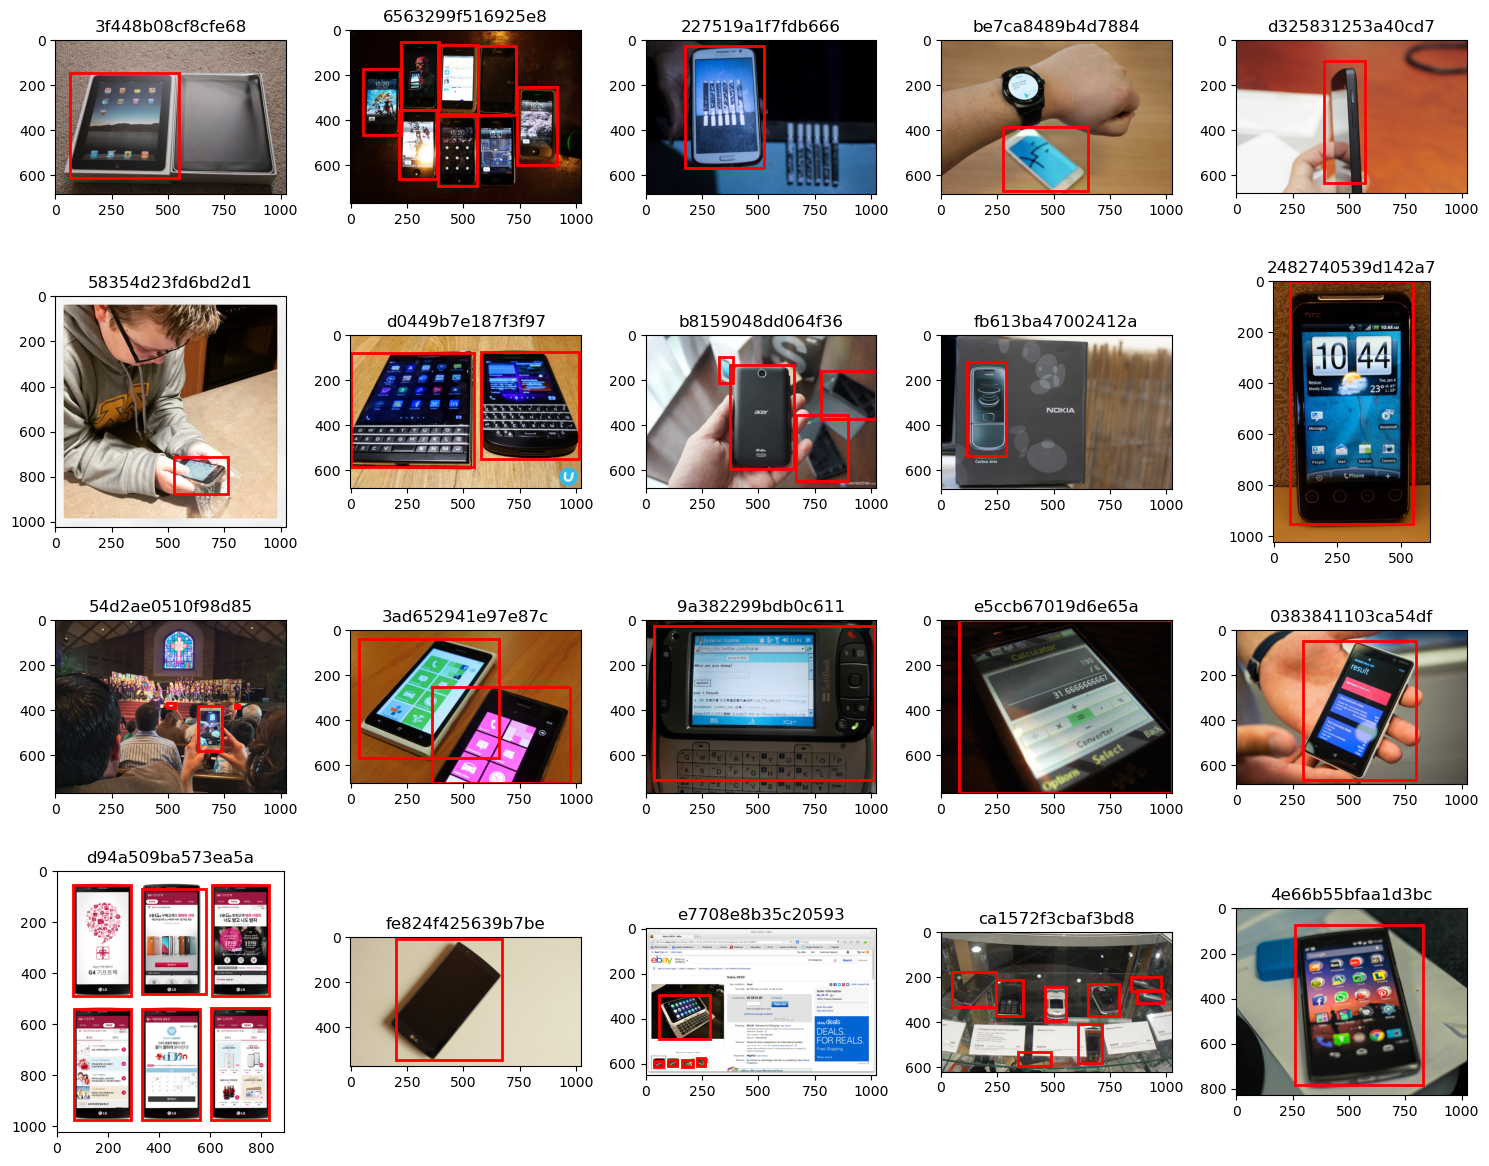

In [13]:
train_images_folder = 'train_images'

# Function to display images with bounding boxes
def display_images_with_boxes(images_to_display, dataset):
    fig, axes = plt.subplots(4, 5, figsize=(15, 12))  # 4x5 grid of images
    
    for i, ax in enumerate(axes.flat):
        if i < len(images_to_display):
            image_id = images_to_display[i]
            image_path = os.path.join('C:\\ANKITH\\MS\\AI SYSTEMS\\AIS-Project_EngageWise\\train_images\\', image_id + '.jpg')
            
            # Read the image using plt.imread (returns a NumPy array)
            img = plt.imread(image_path)
            
            # Get image dimensions (height, width, channels)
            img_height, img_width = img.shape[:2]
            
            # Filter the dataset for the current image ID
            image_data = dataset[dataset['ImageID'] == image_id]
            
            # Draw bounding boxes
            for _, row in image_data.iterrows():
                # Scale normalized coordinates to actual pixel values
                x1, y1 = int(row['XMin'] * img_width), int(row['YMin'] * img_height)
                x2, y2 = int(row['XMax'] * img_width), int(row['YMax'] * img_height)
                
                # Draw the rectangle
                rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, 
                                         fill=False, edgecolor='red', linewidth=2)
                ax.add_patch(rect)
            
            # Display the image
            ax.imshow(img)
            ax.set_title(image_id)
        else:
            # If no more images, hide the axis
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Get a random sample of image IDs from the dataset
num_images_to_display = 20
random_image_ids = mobile_train['ImageID'].sample(num_images_to_display).tolist()

# Display the images with bounding boxes
display_images_with_boxes(random_image_ids, mobile_train)